In [17]:
##Estimación de indicadores de vivienda
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate)

In [18]:
carpetas <- read_csv('https://archivo.datos.cdmx.gob.mx/FGJ/carpetas/carpetasFGJ_acumulado_2024_09.csv')

Rows: 2025785 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): mes_inicio, mes_hecho, delito, categoria_delito, competencia, fis...
dbl   (4): anio_inicio, anio_hecho, latitud, longitud
date  (2): fecha_inicio, fecha_hecho
time  (2): hora_inicio, hora_hecho

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
colnames(carpetas)

[1] "anio_inicio"          "mes_inicio"           "fecha_inicio"        
 [4] "hora_inicio"          "anio_hecho"           "mes_hecho"           
 [7] "fecha_hecho"          "hora_hecho"           "delito"              
[10] "categoria_delito"     "competencia"          "fiscalia"            
[13] "agencia"              "unidad_investigacion" "colonia_hecho"       
[16] "colonia_catalogo"     "alcaldia_hecho"       "alcaldia_catalogo"   
[19] "municipio_hecho"      "latitud"              "longitud"

In [20]:
print(unique(carpetas$alcaldia_hecho))
print(unique(carpetas$categoria_delito))

 [1] "TLALPAN"                "IZTAPALAPA"             "GUSTAVO A. MADERO"     
 [4] "BENITO JUAREZ"          "COYOACAN"               "MIGUEL HIDALGO"        
 [7] "AZCAPOTZALCO"           "VENUSTIANO CARRANZA"    "IZTACALCO"             
[10] "ALVARO OBREGON"         "CUAUHTEMOC"             "XOCHIMILCO"            
[13] "FUERA DE CDMX"          "LA MAGDALENA CONTRERAS" "TLAHUAC"               
[16] "MILPA ALTA"             "CUAJIMALPA DE MORELOS"  NA                      
[19] "CDMX (indeterminada)"  
 [1] "DELITO DE BAJO IMPACTO"                                 
 [2] "ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA"          
 [3] "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA"   
 [4] "ROBO DE VEHÍCULO CON Y SIN VIOLENCIA"                   
 [5] "HOMICIDIO DOLOSO"                                       
 [6] "HECHO NO DELICTIVO"                                     
 [7] "LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO"          
 [8] "ROBO A NEGOCIO CON VIOLENCIA"              

In [21]:
print(unique(carpetas$delito))

  [1] "LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION"                                                                                                                            
  [2] "ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA"                                                                                                                                   
  [3] "ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA"                                                                                                                                  
  [4] "ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA"                                                                                                                           
  [5] "HOMICIDIOS INTENCIONALES (OTROS)"                                                                                                                                                
  [6] "ROBO DE OBJETOS"                                                    

In [22]:
poblacion <- read_csv('https://conapo.segob.gob.mx/work/models/CONAPO/Datos_Abiertos/pry23/00_Pob_Mitad_1950_2070.csv', quote = ';')%>%
janitor::clean_names()

Rows: 737660 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ENTIDAD, SEXO
dbl (5): RENGLON, AÑO, CVE_GEO, EDAD, POBLACION

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [23]:
colnames(poblacion)

[1] "renglon"   "ano"       "entidad"   "cve_geo"   "edad"      "sexo"     
[7] "poblacion"

In [24]:
pob_cdmx <- poblacion %>%
  filter(ano %in% c(2016:2024),
         cve_geo == 9,
         edad >= 18) %>% 
  select(-renglon) %>%
  group_by(ano, entidad, cve_geo) %>%
  summarise(poblacion_total = sum(poblacion), .groups = 'drop') %>% 
  group_by(ano)
  
  pob_cdmx


ano,entidad,cve_geo,poblacion_total
<dbl>,<chr>,<dbl>,<dbl>
2016,Ciudad de México,9,6909676
2017,Ciudad de México,9,6991272
2018,Ciudad de México,9,7074976
2019,Ciudad de México,9,7157355
2020,Ciudad de México,9,7197032
2021,Ciudad de México,9,7198885
2022,Ciudad de México,9,7222176
2023,Ciudad de México,9,7262596
2024,Ciudad de México,9,7300177


In [30]:
# Filtar por aquellos que sucedieron solo en la ciudad, año (16-24) y categoría de delito
carpetas_cdmx <- carpetas %>%
  filter(alcaldia_hecho != 'FUERA DE CDMX',
         anio_hecho %in% c(2016:2024),
         str_detect(
           categoria_delito, 'ROBO A CASA HABITACION CON VIOLENCIA|ROBO A CASA HABITACION SIN VIOLENCIA' ) |
           str_detect(
             categoria_delito, "ROBO DE VEHICULO CON Y SIN VIOLENCIA|HOMICIDIO DOLOSO"))

In [26]:
head(carpetas_cdmx)

anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,⋯,fiscalia,agencia,unidad_investigacion,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud
<dbl>,<chr>,<date>,<time>,<dbl>,<chr>,<date>,<time>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,11:30:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,⋯,INVESTIGACIÓN EN TLALPAN,TLP-3,UI-3CD,PARAJE TETENCO,Pueblo San Pedro Martir,TLALPAN,Tlalpan,CDMX,19.26288,-99.18075
2016,Enero,2016-01-01,00:00:00,2016,Enero,2016-01-01,17:50:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,⋯,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-2,UI-3CD,ZEDEC SANTA FE,San Gabriel,ALVARO OBREGON,Álvaro Obregón,CDMX,19.38218,-99.25283
2016,Enero,2016-01-02,00:00:00,2016,Enero,2016-01-01,08:00:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,⋯,INVESTIGACIÓN EN COYOACÁN,COY-5,UI-3CD,PUEBLO DE SAN PABLO TEPETLAPA,Pueblo San Pablo Tepetlapa,COYOACAN,Coyoacán,CDMX,19.32258,-99.14194
2016,Enero,2016-01-02,00:00:00,2016,Enero,2016-01-01,19:30:00,HOMICIDIO POR ARMA BLANCA,HOMICIDIO DOLOSO,⋯,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-3SD,SAN FRANCISCO TLALTENCO,Pueblo San Francisco Tlaltenco,TLAHUAC,Tláhuac,CDMX,19.29470,-99.01898
2016,Enero,2016-01-02,00:00:00,2016,Enero,2016-01-02,07:50:00,HOMICIDIO POR GOLPES,HOMICIDIO DOLOSO,⋯,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-5,UI-1CD,AMPLIACIÓN PROVIDENCIA,Ampliacion Providencia,GUSTAVO A. MADERO,Gustavo A. Madero,CDMX,19.47941,-99.06919
2016,Enero,2016-01-02,00:00:00,2016,Enero,2016-01-02,16:00:00,HOMICIDIOS INTENCIONALES (OTROS),HOMICIDIO DOLOSO,⋯,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,EL MOLINO,El Santuario,IZTAPALAPA,Iztapalapa,CDMX,19.35558,-99.08981


In [27]:
# Tabla delitos mensuales
delitos_mensual <- carpetas_cdmx %>%
  mutate(fecha_hecho = as.Date(fecha_hecho),
         ano = year(fecha_hecho),
         mes = month(fecha_hecho)) %>%
  group_by(ano, mes) %>%
  summarise(delitos = n(), .groups = 'drop') %>%
    #Obtener promedio diario de delitos
    mutate(promedio_diario = delitos / days_in_month(as.Date(paste(ano, mes, '01', sep = '-'))))

head(delitos_mensual)


ano,mes,delitos,promedio_diario
<dbl>,<dbl>,<int>,<dbl>
2016,1,69,2.225806
2016,2,73,2.517241
2016,3,83,2.677419
2016,4,75,2.500000
2016,5,86,2.774194
2016,6,76,2.533333


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


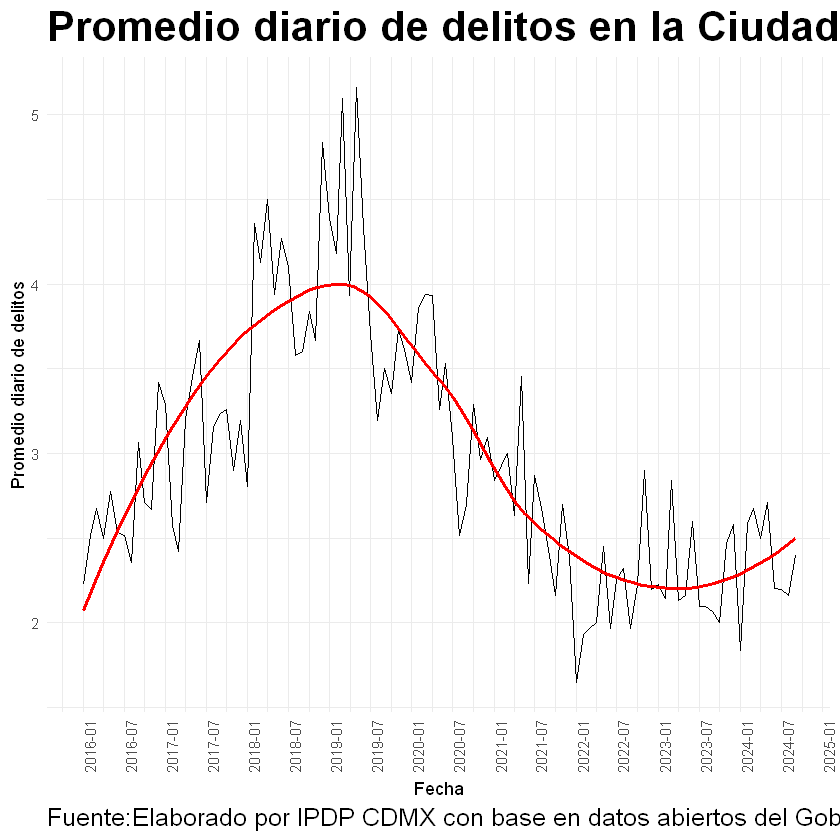

In [35]:
#Gráfica

delitos_mensual %>%
ggplot(aes(x = as.Date(paste(ano, mes, '01', sep = '-')), y = promedio_diario)) +
    geom_line() +
    labs(title = 'Promedio diario de delitos en la Ciudad de México',
         x = 'Fecha',
         y = 'Promedio diario de delitos',
         caption="Fuente:Elaborado por IPDP CDMX con base en datos abiertos del Gobierno de la Ciudad de México"
         ) +
    theme_minimal()+
    geom_smooth(method = 'loess', se = FALSE, color = 'red')+
    theme_minimal()+
    scale_x_date(date_labels = '%Y-%m', date_breaks = '6 month')+
    scale_y_continuous(labels = scales::comma)+
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
    plot.title = element_text(hjust = 0, size=25,face="bold"),
        plot.subtitle = element_text(hjust = 0, size=20, face="italic"),
        plot.caption = element_text(hjust = 0,size=15),
        legend.position = "none")

ggsave('delitos_mensual.png', width = 12, height = 8, units = 'in',,dpi=300,bg="white")